# Preparation

In [1]:
%cd /home/dvc-2-iris-demo

/home/dvc-2-iris-demo


# Load dataset

In [2]:
from src.data.dataset import get_dataset

In [3]:
dataset = get_dataset('data/raw/iris.csv')
dataset.shape

(150, 5)

In [4]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# feature names
feature_names = dataset.columns.tolist()[:4]
feature_names 

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [6]:
# iris species
species = dataset['species'].unique().tolist()
species

['setosa', 'versicolor', 'virginica']

# Features engineering

In [7]:
from src.features.features import extract_features


In [8]:
dataset = extract_features(dataset)
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_to_sepal_width,petal_length_to_petal_width,species
0,5.1,3.5,1.4,0.2,1.457143,7.0,setosa
1,4.9,3.0,1.4,0.2,1.633333,7.0,setosa
2,4.7,3.2,1.3,0.2,1.468750,6.5,setosa
3,4.6,3.1,1.5,0.2,1.483871,7.5,setosa
4,5.0,3.6,1.4,0.2,1.388889,7.0,setosa


# Split dataset

In [9]:
from src.transforms.trainsforms import transform_targets_to_numerics, split_dataset_in_train_test

In [10]:
test_size = 0.2
random_state = 42

## transform targets (species) to numerics

In [11]:
dataset = transform_targets_to_numerics(dataset, 'species')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_to_sepal_width,petal_length_to_petal_width,species
0,5.1,3.5,1.4,0.2,1.457143,7.0,0
1,4.9,3.0,1.4,0.2,1.633333,7.0,0
2,4.7,3.2,1.3,0.2,1.468750,6.5,0
3,4.6,3.1,1.5,0.2,1.483871,7.5,0
4,5.0,3.6,1.4,0.2,1.388889,7.0,0


## Split in train/test

In [12]:
train_dataset, test_dataset = split_dataset_in_train_test(dataset, test_size=test_size, random_state=random_state)
train_dataset.shape, test_dataset.shape

((120, 7), (30, 7))

# Train

In [13]:
from src.train.train import get_supported_estimator, train

In [14]:
# supported classifiers
get_supported_estimator()

{'logreg': sklearn.linear_model.logistic.LogisticRegression,
 'svm': sklearn.svm.classes.SVC,
 'knn': sklearn.neighbors.classification.KNeighborsClassifier}

In [19]:
estimator_name = 'logreg'
param_grid = { 
        'C': [0.001,0.01],
        'max_iter': [5000,6000],
        'solver': ['lbfgs', 'sag'],
        'multi_class': ['multinomial']
    }

scoring = 'f1_macro'
cv = 3

In [20]:
model = train(
    df=dataset,
    target_column='species',
    estimator_name=estimator_name,
    param_grid=param_grid,
    cv=cv
)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.2s finished
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [21]:
model.best_estimator_

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Evaluate

In [22]:
from src.evaluate.evaluate import evaluate
from src.report.visualize import plot_confusion_matrix

In [25]:
f1, cm = evaluate(
    df=dataset,
    target_column='species',
    clf=model
)

In [26]:
f1

0.8987751796740561

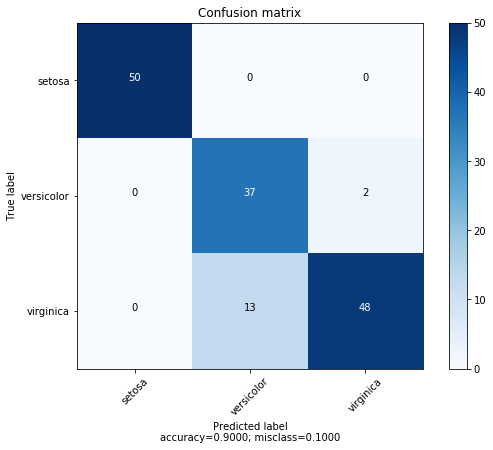

In [27]:
plot_confusion_matrix(cm, species, normalize=False)